In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('../Tables/modelling_data_final.csv') #load data

data.head(10) #visualize first ten records

,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,BUILT_UP_COMMERCIAL_USE,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6492E0610,0.677568,29.92,0.5050,0.0000,0.0000,0.0000,0.0000,17.64,0.0000,...,47.633891,80540.409500,610500.0,6492500.0,226,2010,0.0000,0.0000,100.0000,0.0000
1,1kmN6588E0714,0.847841,22.19,0.0150,0.4875,0.0000,3.0450,0.0000,0.00,0.0025,...,30.707187,1384.763052,714500.0,6588500.0,188,2010,0.2025,2.9700,96.8275,0.2025
2,1kmN6428E0668,0.776277,28.23,0.9725,0.0000,0.0000,0.0375,0.0000,0.00,0.0000,...,130.712827,137763.341200,668500.0,6428500.0,199,2010,0.0200,0.3650,99.6150,0.0200
3,1kmN6434E0633,0.803441,29.69,0.1250,0.1650,0.0000,0.3525,0.0000,0.00,0.0000,...,144.721258,102391.365700,633500.0,6434500.0,220,2010,0.0375,1.4975,98.4650,0.0375
4,1kmN6536E0458,0.722252,28.41,21.3300,0.0000,0.0000,16.6800,0.0000,0.00,0.0000,...,1.930039,0.000000,458500.0,6536500.0,194,2010,0.0000,0.0000,100.0000,0.0000
5,1kmN6473E0612,0.759836,24.35,0.1825,0.8750,0.0000,0.0050,0.0000,0.00,0.0000,...,39.817499,78148.426560,612500.0,6473500.0,222,2010,0.2375,3.4525,96.3100,0.2375
6,1kmN6441E0595,0.835678,19.77,0.0225,0.0000,0.0000,1.4675,0.0000,0.00,0.0000,...,93.667815,63998.267430,595500.0,6441500.0,221,2010,0.1500,1.7250,98.1250,0.1500
7,1kmN6535E0530,0.713367,25.33,0.3375,0.0000,0.0000,0.7650,0.0000,0.00,0.0000,...,45.098421,42200.140230,530500.0,6535500.0,210,2010,0.2375,1.4875,98.2750,0.2375
8,1kmN6475E0614,0.859155,27.25,0.1075,0.0000,0.0000,3.5800,0.0000,0.00,0.0000,...,35.858296,80394.012760,614500.0,6475500.0,199,2010,0.1625,2.1350,97.7025,0.1625
9,1kmN6521E0583,0.746326,24.60,2.2725,4.0550,5.7925,2.6025,0.0825,0.00,6.1525,...,58.391305,73073.370660,583500.0,6521500.0,197,2010,2.8625,18.4425,78.6950,2.8625


In [3]:

cols = data.columns

cols

Index(['GRD_INSPIR', 'ndvi', 'lst', 'WATER', 'ROADS', 'URBAN_GREENERY',
       'OTHER', 'BUILT_UP_COMMERCIAL_USE', 'EXTRACTION_SITES',
       'OPEN_SPACE_COMMERCIAL', 'CROPLAND', 'AGRICULTURAL_LAND',
       'NATURAL_VEGETATION', 'OPEN_SPACE_MIXED_USE', 'FOREST', 'WETLANDS',
       'BUILT_UP_MIXED_USE', 'BUILT_UP_AGRICULTURE', 'elevation', 'dist_coast',
       'x', 'y', 'doy', 'year', 'building surface', 'impervious surface',
       'pervious surface', 'BUILT_UP'],
      dtype='object')

In [4]:
data.rename(columns = {'ndvi':'NDVI', 'lst':'LST', 
                              'dist_coast':'DIST_COAST', 
                       'elevation':'ELEVATION','x':'X','y':'Y',
                       'doy':'DOY','year':'Year',
                      'building surface': 'BUILDING SURFACE','impervious surface':'IMPERVIOUS SURFACE',
                       'pervious surface':'PERVIOUS SURFACE'}, inplace = True) 

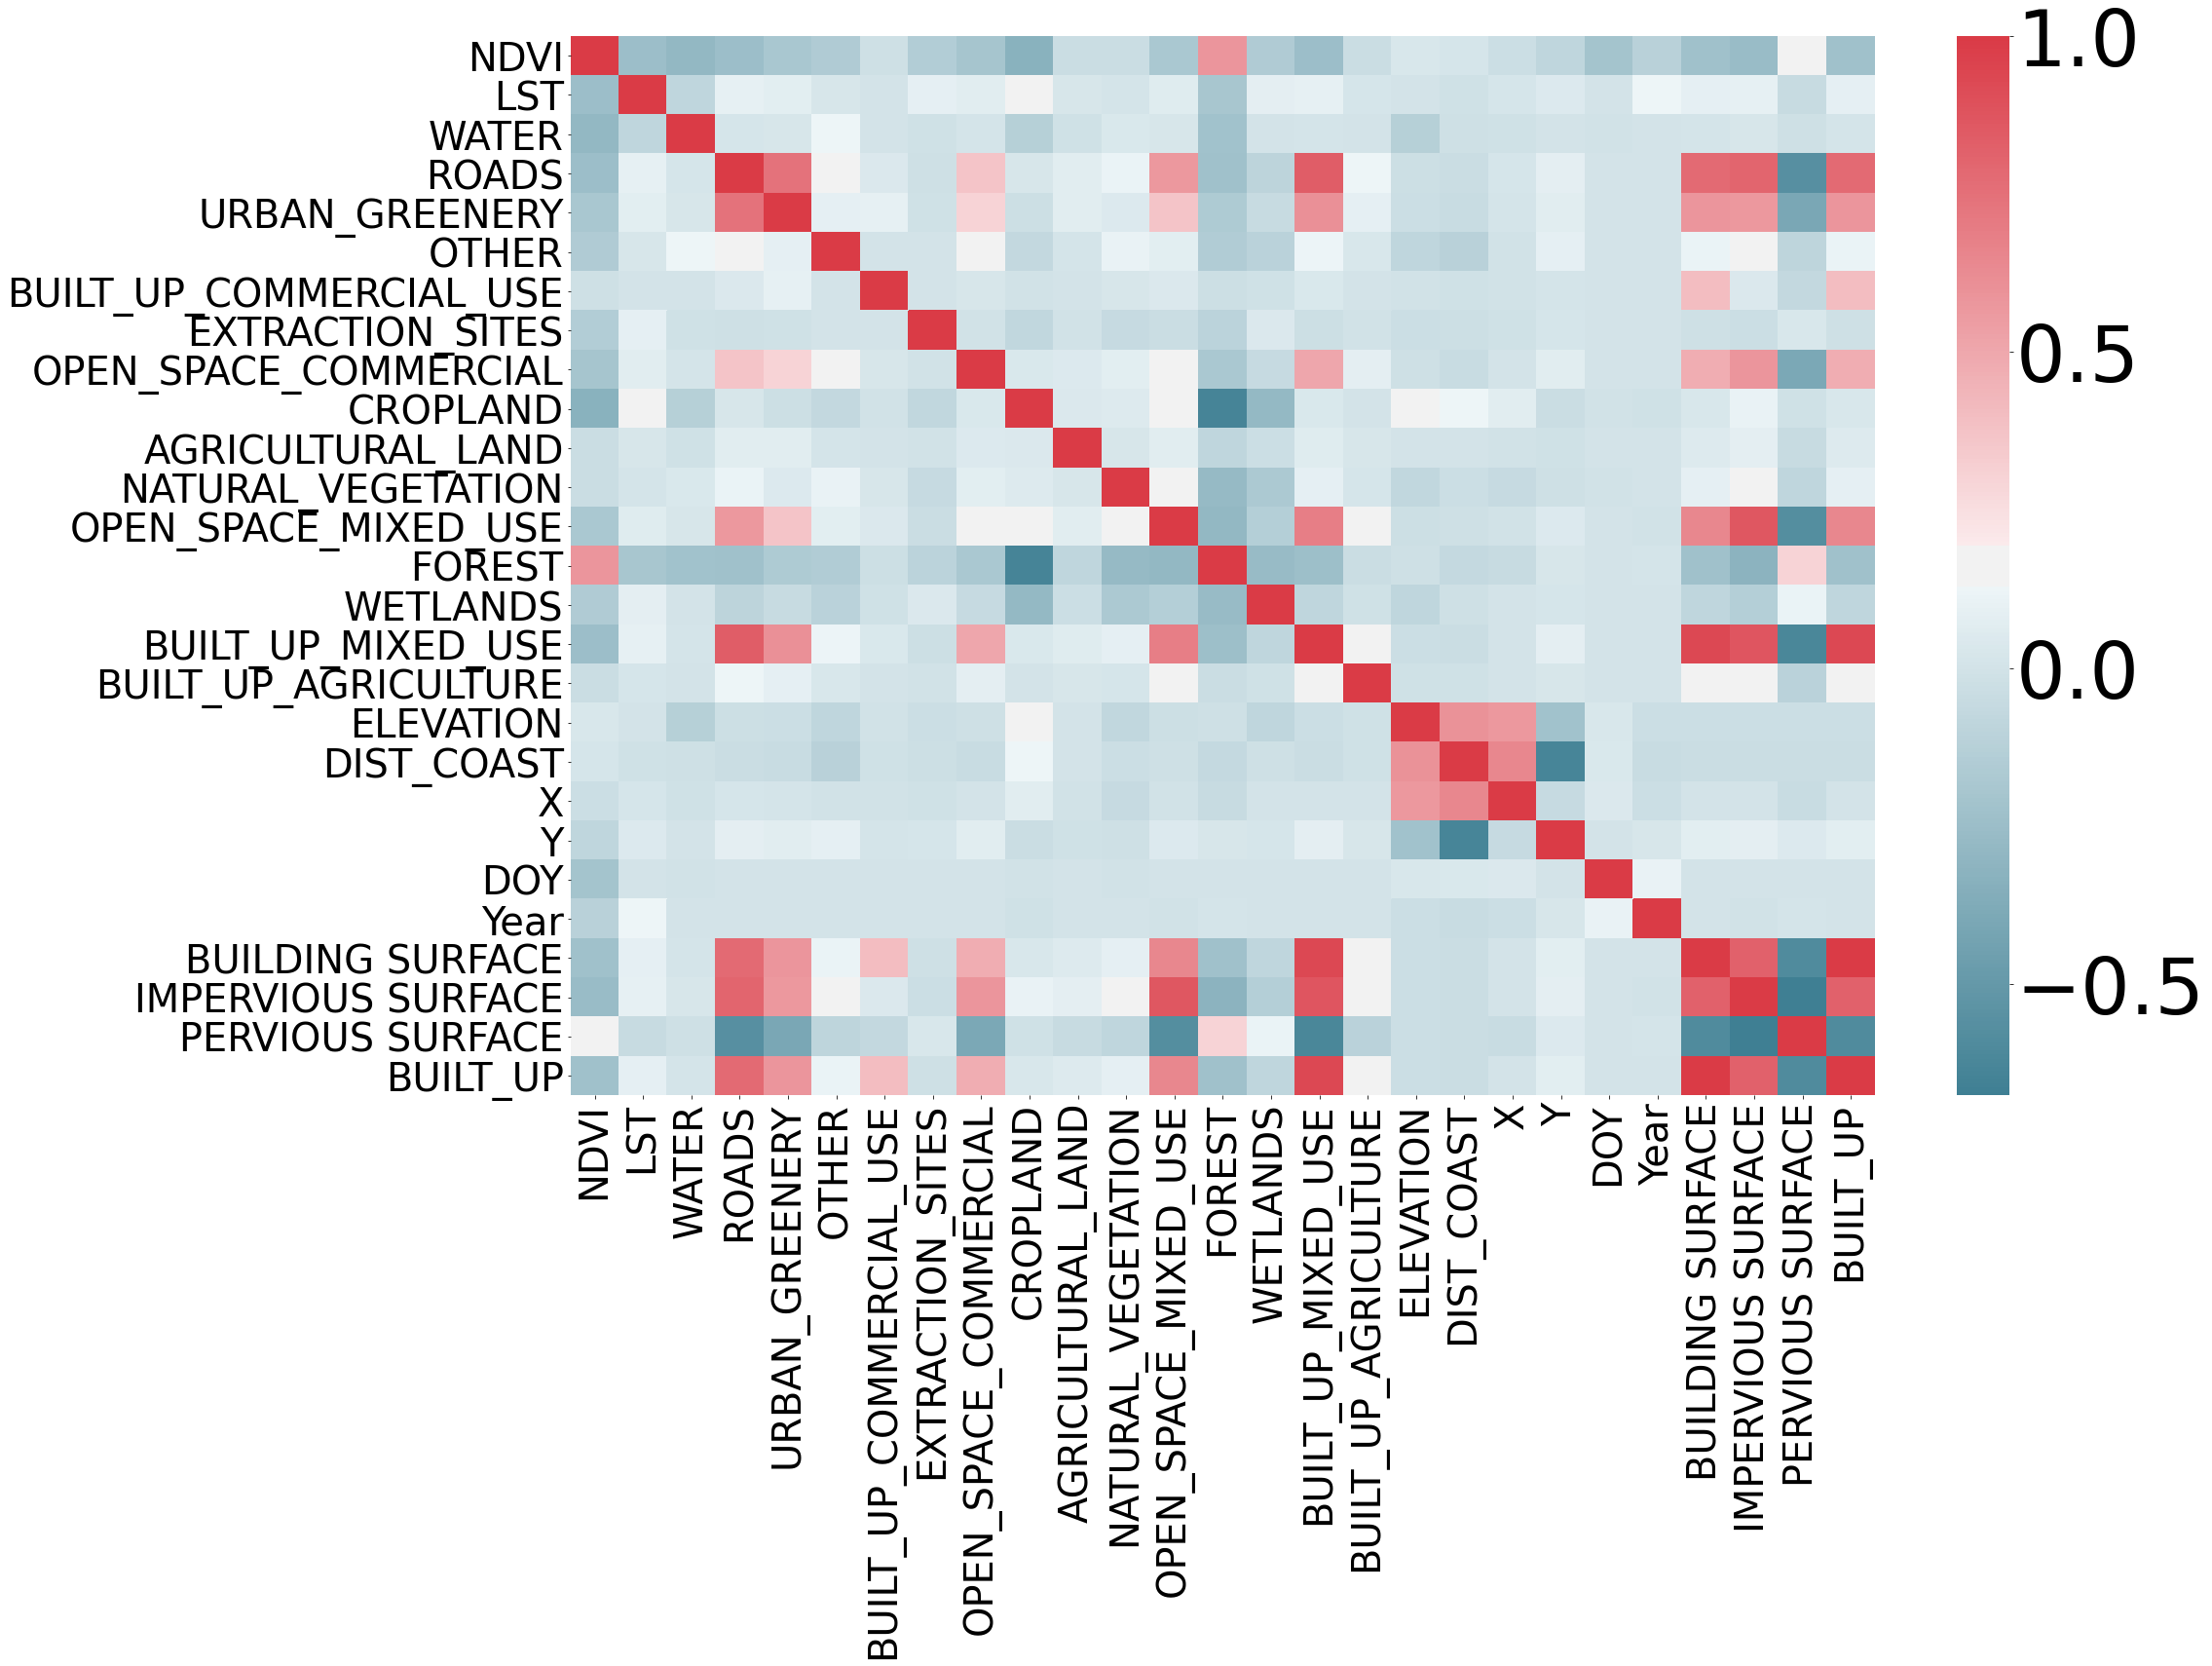

In [5]:
#feature Correlation
#plt.rcParams['figure.figsize'] = [120,110]
plt.figure(figsize=(30,20))
cor = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap)#cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=80)
#plt.savefig('correlation matrix_full.png',format='png')
plt.show()

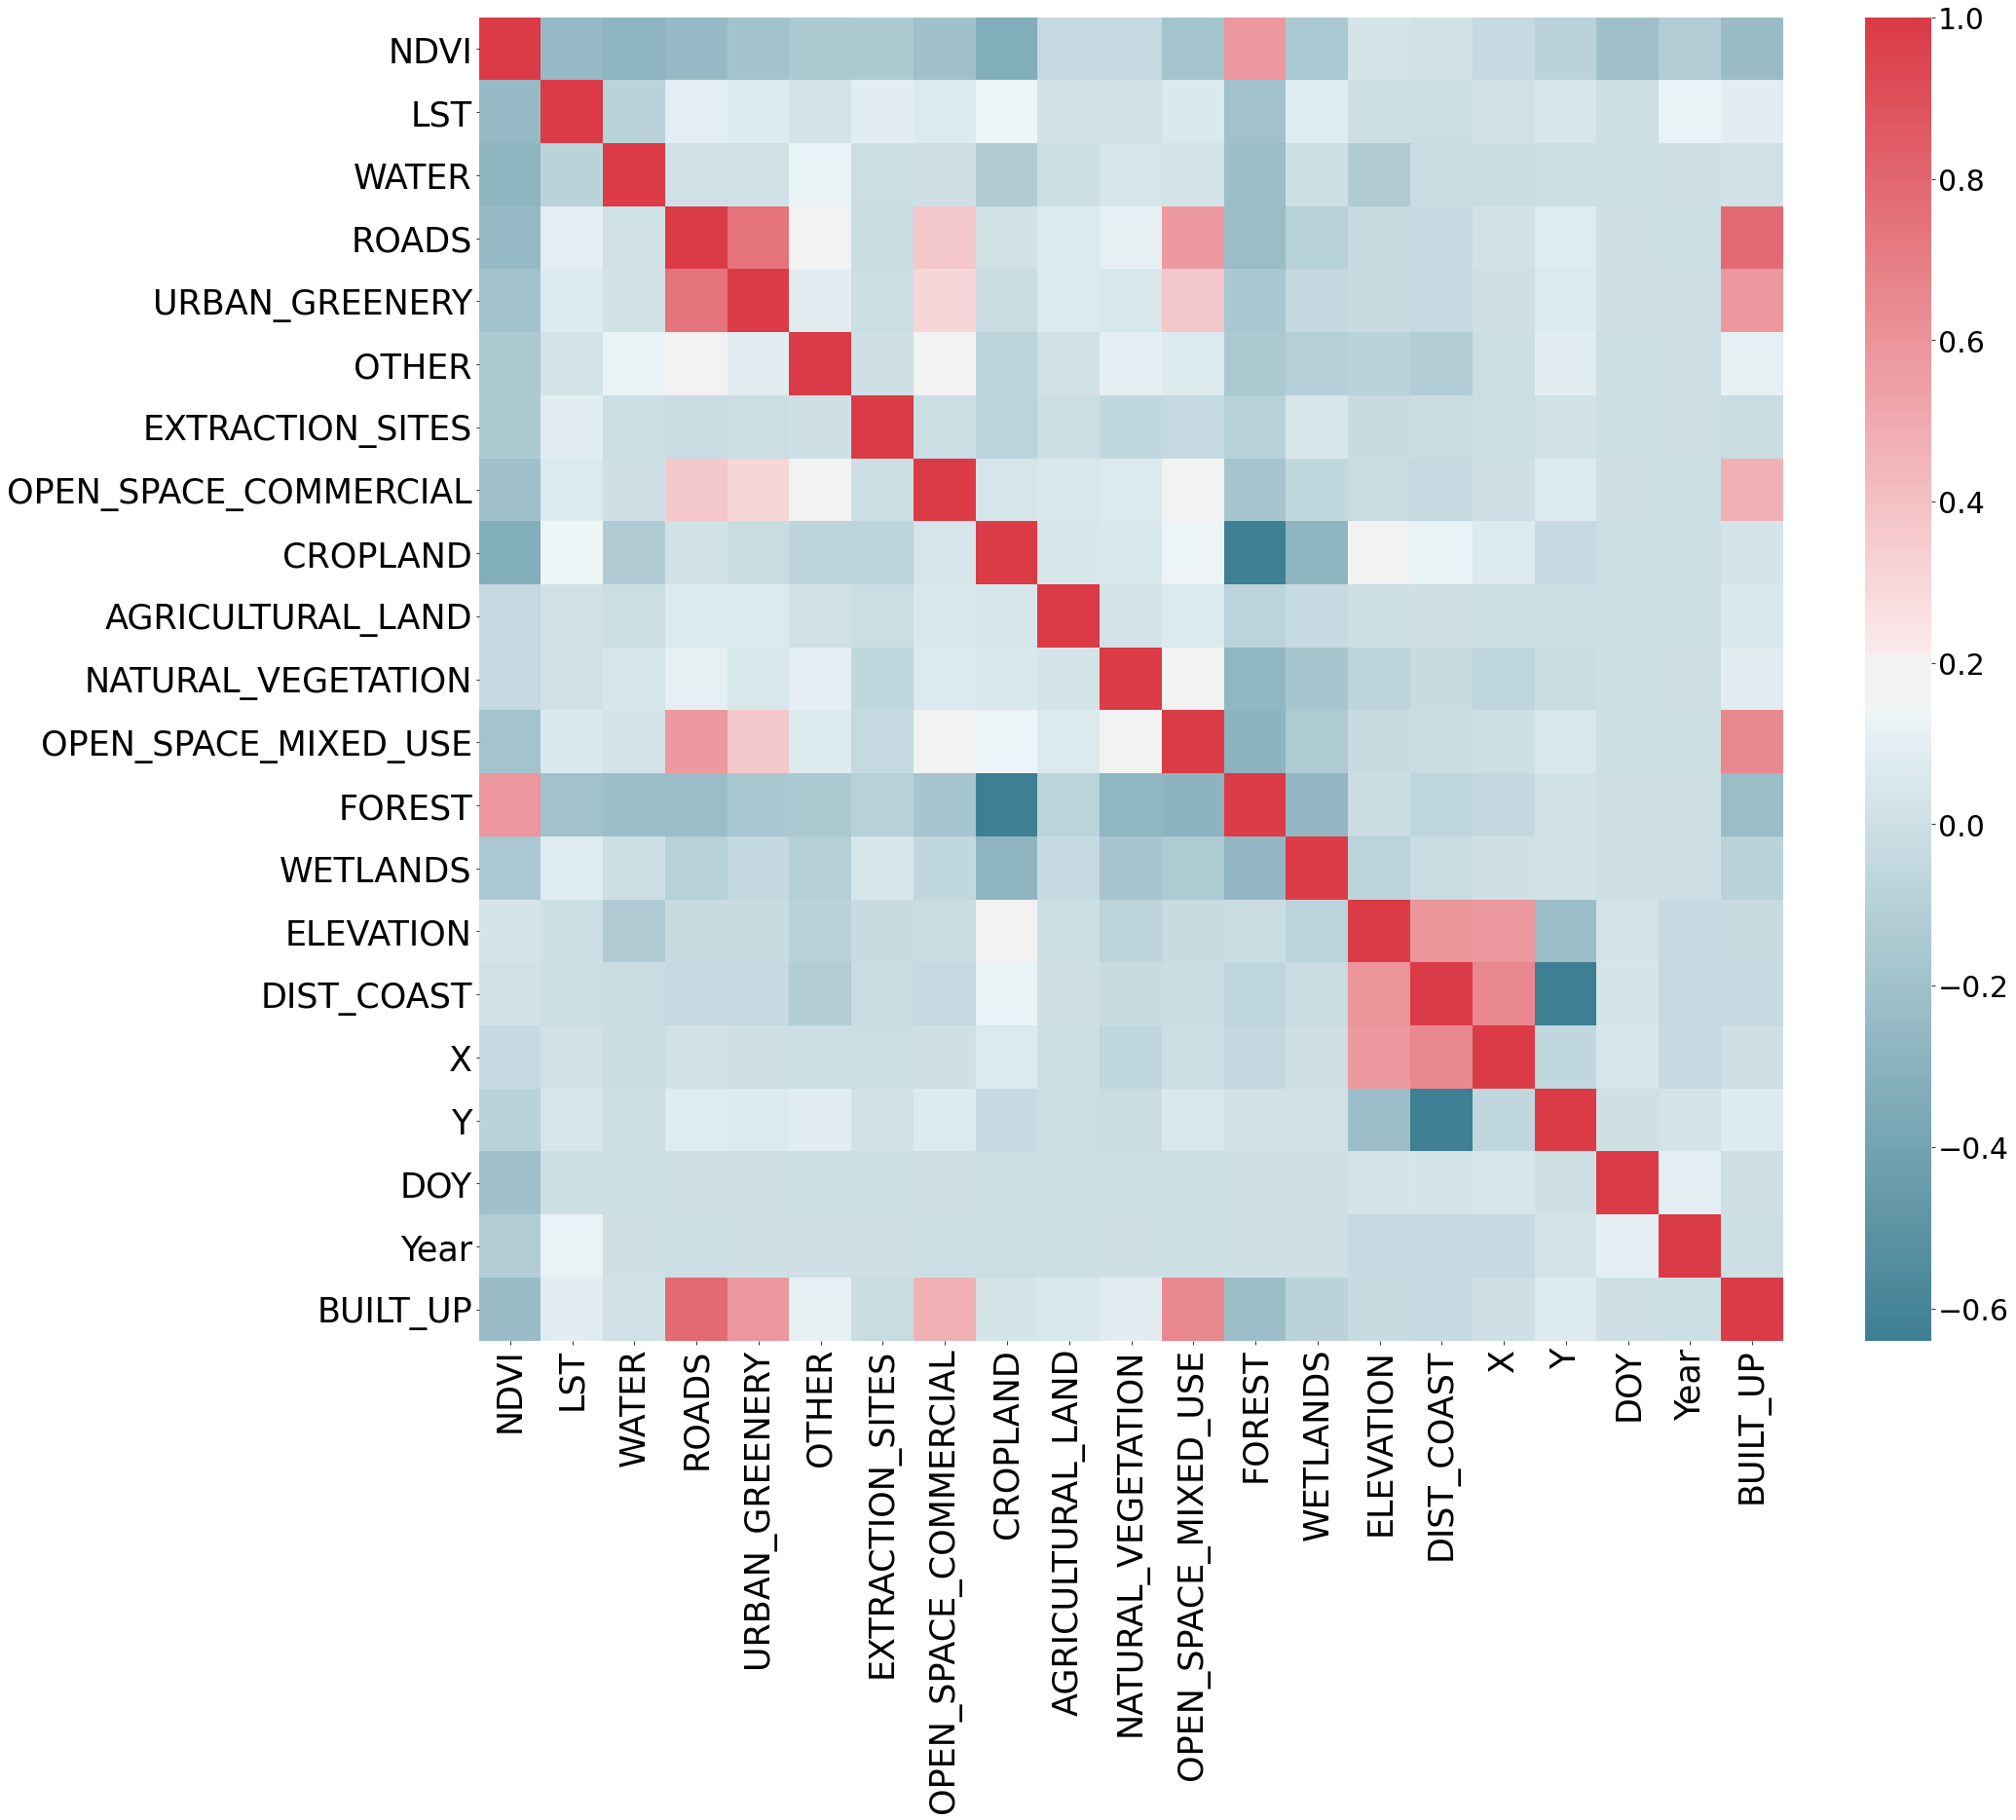

In [6]:
#feature Correlation
plt.figure(figsize=(30,25))
cor = data.drop(columns=['BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP_COMMERCIAL_USE','BUILT_UP_MIXED_USE','BUILT_UP_AGRICULTURE']).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap,annot_kws={"fontsize":20})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 35, color ='black')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 35)
ax.figure.axes[-1].tick_params(labelsize=30)
plt.savefig('correlation land use.png',format='png')
plt.show()

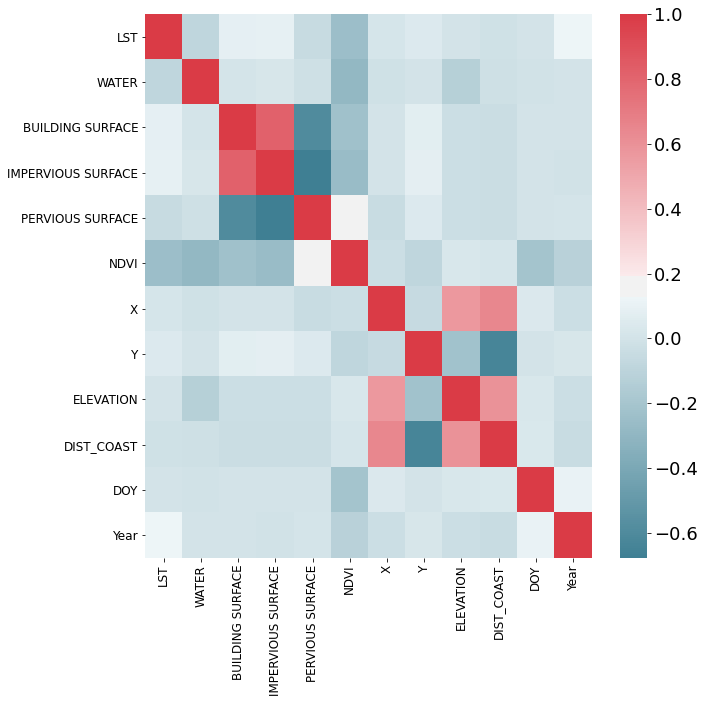

In [7]:
plt.figure(figsize=(10,10))
cor = data[['LST','WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE','NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor,annot=False, cmap=cmap,annot_kws={"fontsize":8})#cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)
ax.figure.axes[-1].tick_params(labelsize=18)


#sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.savefig('correlation surfaces.png',format='png')
plt.show()

In [8]:
#linear regression baseline model

X=data.drop(columns=['GRD_INSPIR','LST','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP_COMMERCIAL_USE','BUILT_UP_MIXED_USE','BUILT_UP_AGRICULTURE'
                    ]) #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
scaler = StandardScaler()
X_train_a=scaler.fit_transform(X_train)
X_test_a=scaler.transform(X_test)




reg= LinearRegression()

model = reg.fit(X_train_a,y_train)

#get model coeff
for i, v in enumerate (model.coef_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
    
predictions = model.predict(X_test_a)

print('\n''rmse linear reg model with ndvi: ', np.sqrt(mean_squared_error(y_test, predictions)))

print('\n''rmse linear reg model without ndvi training: ', np.sqrt(mean_squared_error(y_train, model.predict(X_train_a))))

print('R_sq train: ',model.score(X_train_a,y_train))

print('R_sq test: ',model.score(X_test_a,y_test))

Feature:NDVI Score: -0.79
Feature:WATER Score: -0.53
Feature:ROADS Score: 0.07
Feature:URBAN_GREENERY Score: 0.03
Feature:OTHER Score: 0.01
Feature:EXTRACTION_SITES Score: 0.19
Feature:OPEN_SPACE_COMMERCIAL Score: 0.01
Feature:CROPLAND Score: 0.19
Feature:AGRICULTURAL_LAND Score: 0.01
Feature:NATURAL_VEGETATION Score: 0.02
Feature:OPEN_SPACE_MIXED_USE Score: -0.06
Feature:FOREST Score: -0.12
Feature:WETLANDS Score: 0.19
Feature:ELEVATION Score: -0.07
Feature:DIST_COAST Score: 0.07
Feature:X Score: 0.01
Feature:Y Score: 0.11
Feature:DOY Score: -0.22
Feature:Year Score: 0.38
Feature:BUILT_UP Score: 0.07

rmse linear reg model with ndvi:  3.3229644636968425

rmse linear reg model without ndvi training:  3.318358329349828
R_sq train:  0.11044193245974776
R_sq test:  0.11043880618701263


In [9]:
#linear regression baseline model

X=data[['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
        'NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']] #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
scaler = StandardScaler()
X_train_a=scaler.fit_transform(X_train)
X_test_a=scaler.transform(X_test)




reg= LinearRegression()

model = reg.fit(X_train_a,y_train)

#get model coeff
for i, v in enumerate (model.coef_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
    
predictions = model.predict(X_test_a)
print('\n''rmse linear reg model without ndvi: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('\n''rmse linear reg model without ndvi training: ', np.sqrt(mean_squared_error(y_train, model.predict(X_train_a))))

print('R_sq train: ',model.score(X_train_a,y_train))

print('R_sq test: ',model.score(X_test_a,y_test))

Feature:WATER Score: -0.60
Feature:BUILDING SURFACE Score: 0.08
Feature:IMPERVIOUS SURFACE Score: -0.01
Feature:PERVIOUS SURFACE Score: 0.00
Feature:NDVI Score: -1.03
Feature:X Score: 0.01
Feature:Y Score: 0.11
Feature:ELEVATION Score: -0.07
Feature:DIST_COAST Score: 0.10
Feature:DOY Score: -0.27
Feature:Year Score: 0.35

rmse linear reg model without ndvi:  3.3383094126816095

rmse linear reg model without ndvi training:  3.3332591314082625
R_sq train:  0.1024350279173254
R_sq test:  0.102204117712557


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
X=data.drop(columns=['GRD_INSPIR','LST','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP_COMMERCIAL_USE','BUILT_UP_MIXED_USE','BUILT_UP_AGRICULTURE']) #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
#scaler = StandardScaler()
#X_train_a=scaler.fit_transform(X_train)
#X_test_a=scaler.fit_transform(X_test)

rf = RandomForestRegressor(criterion='mse',n_jobs=-1)

model = rf.fit(X_train,y_train)

for i, v in enumerate (model.feature_importances_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

print('\n''rmse_train rf reg model: ', np.sqrt(mean_squared_error(y_train, predictions_train)))

print('\n''rmse_test rf reg model: ', np.sqrt(mean_squared_error(y_test, predictions_test)))

Feature:NDVI Score: 0.10
Feature:WATER Score: 0.02
Feature:ROADS Score: 0.01
Feature:URBAN_GREENERY Score: 0.00
Feature:OTHER Score: 0.01
Feature:EXTRACTION_SITES Score: 0.00
Feature:OPEN_SPACE_COMMERCIAL Score: 0.00
Feature:CROPLAND Score: 0.01
Feature:AGRICULTURAL_LAND Score: 0.00
Feature:NATURAL_VEGETATION Score: 0.01
Feature:OPEN_SPACE_MIXED_USE Score: 0.01
Feature:FOREST Score: 0.02
Feature:WETLANDS Score: 0.01
Feature:ELEVATION Score: 0.03
Feature:DIST_COAST Score: 0.05
Feature:X Score: 0.08
Feature:Y Score: 0.06
Feature:DOY Score: 0.47
Feature:Year Score: 0.09
Feature:BUILT_UP Score: 0.01

rmse_train rf reg model:  0.5175069304640928

rmse_test rf reg model:  1.379084705784129


In [12]:
print('rf reg model R_sq: ',model.score(X_train,y_train))

print('rf reg model R_sq: ',model.score(X_test,y_test))

rf reg model R_sq:  0.9783648415036921
rf reg model R_sq:  0.8467832240633474


In [13]:
X=data[['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
        'NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']] #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
#scaler = StandardScaler()
#X_train_a=scaler.fit_transform(X_train)
#X_test_a=scaler.fit_transform(X_test)

rf = RandomForestRegressor(criterion='mse',n_jobs=-1)

model = rf.fit(X_train,y_train)

for i, v in enumerate (model.feature_importances_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

print('\n''rmse_train rf reg model_surfaces: ', np.sqrt(mean_squared_error(y_train, predictions_train)))

print('\n''rmse_test rf reg model_surfaces: ', np.sqrt(mean_squared_error(y_test, predictions_test)))


print('rf reg model_surfaces R_sq: ',model.score(X_train,y_train))

print('rf reg model_surfaces R_sq: ',model.score(X_test,y_test))

Feature:WATER Score: 0.03
Feature:BUILDING SURFACE Score: 0.01
Feature:IMPERVIOUS SURFACE Score: 0.01
Feature:PERVIOUS SURFACE Score: 0.01
Feature:NDVI Score: 0.11
Feature:X Score: 0.10
Feature:Y Score: 0.07
Feature:ELEVATION Score: 0.04
Feature:DIST_COAST Score: 0.06
Feature:DOY Score: 0.47
Feature:Year Score: 0.09

rmse_train rf reg model_surfaces:  0.5017252631621613

rmse_test rf reg model_surfaces:  1.3402426697808074
rf reg model_surfaces R_sq:  0.9796642741009763
rf reg model_surfaces R_sq:  0.855292408095768
